In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle
import pandas as pd

# Lab 6

In [2]:
background2 = stats.poisson.rvs(mu = 100, size = 10**6)

## Problem 1

Text(0, 0.5, 'Counts')

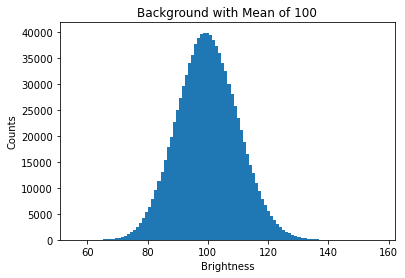

In [3]:
plt.hist(background2, bins = 100)
plt.title('Background with Mean of 100')
plt.xlabel('Brightness')
plt.ylabel('Counts')

In [4]:
probability = stats.norm.cdf(5)
sigma = stats.poisson(mu = 100).ppf(probability)
print('5 sigma threshold is : ' + str(sigma))

5 sigma threshold is : 154.0


## Problem 2

In [5]:
eight = stats.poisson(mu = 100).ppf(stats.norm.cdf(8))
print(eight)
signal2 = 191
data2 = background2 + signal2

190.0


### 2.a

Text(0, 0.5, 'Counts')

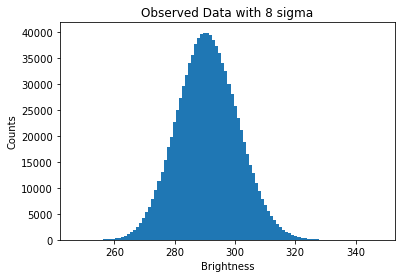

In [6]:
plt.hist(data2, bins = 100)
plt.title('Observed Data with 8 sigma')
plt.xlabel('Brightness')
plt.ylabel('Counts')

Original background histogram has the brightness of approximately between 50 and 160. The new histogram has the brightness of approximately 240 to 360, which is brighter. The overall shape is similar to the background. This histogram tells me that adding the signal results as a shift to the background histogram.

### 2.b

The observed value is likely to be stronger than the injected signal so it is biased. It is also symmetric.

## Problem 3

### Problem 3.a <br>
I am simulating all the possible data signal distribution given many theories (injected signals from 0 to more than 30 sigma) 

<ipython-input-7-74c66a8def19>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

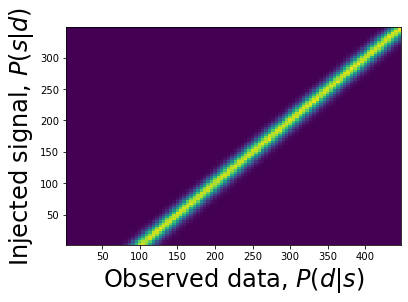

In [7]:
background = stats.poisson.rvs(mu = 100,size = 10**6)
signal = np.random.uniform(0, 350, 10**6)

data = background + signal

signaledges = np.linspace(0, 350, 100)
dataedges = np.linspace(0, 450, 100)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('Injected signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

### Problem 3.b

190.9090909090909
191


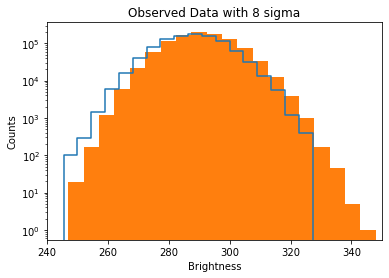

In [17]:
s = signaledges[54]
print(s)
ts = int(np.round(s))
print(ts)
plt.step(temp[: - 1],(Psd[:,54] / np.sum(Psd[:, 54]))* 10**6)
plt.title('True Signal = 191 P(d|s)')
plt.xlabel('Observed Signal')
plt.ylabel('Probability')
plt.xlim(240, 350)
plt.yscale('log')

plt.hist(data2, bins = 20)
plt.title('Observed Data with 8 sigma')
plt.xlabel('Brightness')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()

It is very similar to what I got from Problem 2. Both are within the range of 240 and 360 with the similar shape. Their means also both lay between 280 and 300 while they are closer to 300.

### Problem 3.c

159.0909090909091
159


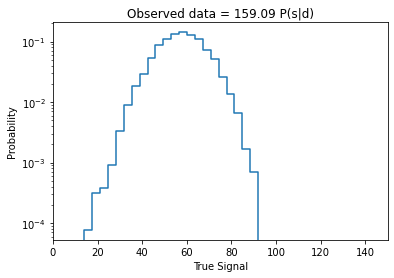

In [18]:
d = dataedges[35]
print(d)
od = int(np.round(d))
print(od)
plt.step(temp2[: - 1], Psd[35, :] / np.sum(Psd[35,:]))
plt.title('Observed data = 159.09 P(s|d)')
plt.xlabel('True Signal')
plt.ylabel('Probability')
plt.xlim(0, 150)
plt.yscale('log')
plt.show()

This histogram indicates the probability of getting the value of true signal given that the value of observed data is 159.

### Problem 3.d

In [19]:
np.max(Psd[35, :] / np.sum(Psd[35,:]))

0.14284613012642614

In [20]:
for i in range(25):
    y = np.max(Psd[35, i] / np.sum(Psd[35,:]))
    print('Index is ' + str(i) + ' = ' + 'Signal Value is ' + str(temp2[i]) +' = ' + str(y))

Index is 0 = Signal Value is 0.0 = 0.0
Index is 1 = Signal Value is 3.5353535353535355 = 0.0
Index is 2 = Signal Value is 7.070707070707071 = 0.0
Index is 3 = Signal Value is 10.606060606060606 = 0.0
Index is 4 = Signal Value is 14.141414141414142 = 0.0
Index is 5 = Signal Value is 17.67676767676768 = 7.708911501695968e-05
Index is 6 = Signal Value is 21.21212121212121 = 0.0003083564600678384
Index is 7 = Signal Value is 24.747474747474747 = 0.000385445575084798
Index is 8 = Signal Value is 28.282828282828284 = 0.0009250693802035151
Index is 9 = Signal Value is 31.81818181818182 = 0.0033148319457292626
Index is 10 = Signal Value is 35.35353535353536 = 0.008788159111933395
Index is 11 = Signal Value is 38.88888888888889 = 0.01865556583410426
Index is 12 = Signal Value is 42.42424242424242 = 0.02929386370644465
Index is 13 = Signal Value is 45.95959595959596 = 0.05411655874190564
Index is 14 = Signal Value is 49.494949494949495 = 0.08842121492445267
Index is 15 = Signal Value is 53.03030

In [12]:
maximum_signal = temp2[17]
print(maximum_signal)

60.101010101010104


In [13]:
total_one_sigma = np.sum(Psd[35,:])*0.341
print(total_one_sigma)

0.0002784488832742135


In [14]:
left_threshold = Psd[35, 17]/2 + Psd[35, 16] + Psd[35, 15]
print(left_threshold)

0.00025604230196639714


In [15]:
right_threshold = Psd[35, 17]/2 + Psd[35, 18] + Psd[35, 19]
print(right_threshold)

0.0002523912992585788


In [16]:
lower = temp2[15] - temp2[17]
upper = temp2[19] - temp2[17]
print('Lower 34% = ' + str(lower))
print('Upper 34% = ' + str(upper))

Lower 34% = -7.070707070707073
Upper 34% = 7.070707070707073


The 1 sigma uncertainty is 7.07.

### Problem 3.e

Since the 1 sigma uncertainty is the same for lower and upper, it is symmetric. Also, since the observed data is stronger than the true signal, it is going to be biased. This makes sense as the non-zero mean background impacts the observed data and its mean.